In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as nm
import seaborn as sns
from sklearn import tree

In [2]:
df=pd.read_csv('book1.csv')
df.head()

,nu_idade,tp_sexo,tp_gestante,tp_raca_cor,tp_zona_residencia,febre,mialgia,cefaleia,exantema,vomito,...,laco,dor_retro,diabetes,hematolog,hepatopat,renal,hipertensao,acido_pept,auto_imune,tp_classificacao_final
0,3006.0,M,6.0,9.0,1.0,1.0,2.0,2.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,8.0
1,4027.0,M,6.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2,4050.0,F,6.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,4004.0,M,6.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
4,4025.0,F,5.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0


In [3]:
df.shape

(83073, 26)

In [4]:
df.isnull().sum().sum()

950617

In [5]:
#df.dropna(subset=['tp_classificacao_final','tp_sexo'])
#df=df.fillna(value=0)

In [6]:
#df=df.fillna(value=df['tp_gestante'].mean())
#df.isnull().sum().sum()
df.isnull().sum()

nu_idade                   2375
tp_sexo                    2382
tp_gestante                2384
tp_raca_cor               12685
tp_zona_residencia        12045
febre                     45804
mialgia                   45803
cefaleia                  45803
exantema                  45803
vomito                    45803
nausea                    45803
dor_costas                45803
conjutivite               45803
artrite                   45803
artralgia                 45803
petequia_n                45803
laco                      45803
dor_retro                 45803
diabetes                  45803
hematolog                 45803
hepatopat                 45803
renal                     45803
hipertensao               45803
acido_pept                45803
auto_imune                45803
tp_classificacao_final     2685
dtype: int64

In [7]:
df=df.dropna(subset=['tp_classificacao_final'])

In [8]:
df=df.drop(['nu_idade','tp_sexo','tp_raca_cor'],axis=1)

In [9]:
df=df.drop(df[df['tp_classificacao_final'] == 1].index)
df=df.drop(df[df['tp_classificacao_final'] == 2].index)
df=df.drop(df[df['tp_classificacao_final'] == 11].index)
df=df.drop(df[df['tp_classificacao_final'] == 12].index)

In [10]:
df.isnull().sum()

tp_gestante                   9
tp_zona_residencia         9433
febre                     38141
mialgia                   38141
cefaleia                  38141
exantema                  38141
vomito                    38141
nausea                    38141
dor_costas                38141
conjutivite               38141
artrite                   38141
artralgia                 38141
petequia_n                38141
laco                      38141
dor_retro                 38141
diabetes                  38141
hematolog                 38141
hepatopat                 38141
renal                     38141
hipertensao               38141
acido_pept                38141
auto_imune                38141
tp_classificacao_final        0
dtype: int64

In [11]:
df2=df.fillna(value=df['febre'].mean())

In [12]:
df2.head()

,tp_gestante,tp_zona_residencia,febre,mialgia,cefaleia,exantema,vomito,nausea,dor_costas,conjutivite,...,laco,dor_retro,diabetes,hematolog,hepatopat,renal,hipertensao,acido_pept,auto_imune,tp_classificacao_final
0,6.0,1.0,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.0
1,6.0,1.0,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,...,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,5.0
2,6.0,1.0,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,...,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,5.0
3,6.0,1.0,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,...,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,10.0
4,5.0,1.0,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,...,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,1.197188,10.0


In [13]:
#df3=df.fillna({'tp_gestante':df['tp_gestante'].mean(),'febre':df['febre'].mode()[0],'mialgia':df['mialgia'].mean(),'cefaleia':df['cefaleia'].mean(),'exantema':df['exantema'].mean(),'vomito':df['vomito'].mean(),'nausea':df['nausea'].mean(),'dor_costas':df['dor_costas'].mean(),'conjutivite':df['conjutivite'].mean(),'artrite':df['artrite'].mean(),'artralgia':df['artralgia'].mean(),'petequia_n':df['petequia_n'].mean(),'laco':df['laco'].mean(),'dor_retro':df['dor_retro'].mean(),'diabetes':df['diabetes'].mean(),'hematolog':df['hematolog'].mean(),'hepatopat':df['hepatopat'].mean(),'renal':df['renal'].mean(),'hipertensao':df['hipertensao'].mean(),'acido_pept':df['acido_pept'].mean(),'auto_imune':df['auto_imune'].mean()})
df3=df.fillna({'tp_gestante':df['tp_gestante'].mode()[0],'tp_zona_residencia':df['tp_zona_residencia'].mode()[0],
               'febre':df['febre'].mode()[0],'mialgia':df['mialgia'].mode()[0],
               'cefaleia':df['cefaleia'].mode()[0],'exantema':df['exantema'].mode()[0],'vomito':df['vomito'].mode()[0],
               'nausea':df['nausea'].mode()[0],'dor_costas':df['dor_costas'].mode()[0],'conjutivite':df['conjutivite'].mode()[0],
               'artrite':df['artrite'].mode()[0],'artralgia':df['artralgia'].mode()[0],'petequia_n':df['petequia_n'].mode()[0],
               'laco':df['laco'].mode()[0],'dor_retro':df['dor_retro'].mode()[0],'diabetes':df['diabetes'].mode()[0],
               'hematolog':df['hematolog'].mode()[0],'hepatopat':df['hepatopat'].mode()[0],'renal':df['renal'].mode()[0],
               'hipertensao':df['hipertensao'].mode()[0],'acido_pept':df['acido_pept'].mode()[0],'auto_imune':df['auto_imune'].mode()[0]})

In [14]:
df3.head()

,tp_gestante,tp_zona_residencia,febre,mialgia,cefaleia,exantema,vomito,nausea,dor_costas,conjutivite,...,laco,dor_retro,diabetes,hematolog,hepatopat,renal,hipertensao,acido_pept,auto_imune,tp_classificacao_final
0,6.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,8.0
1,6.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0
2,6.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0
3,6.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,10.0
4,5.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,10.0


<Axes: >

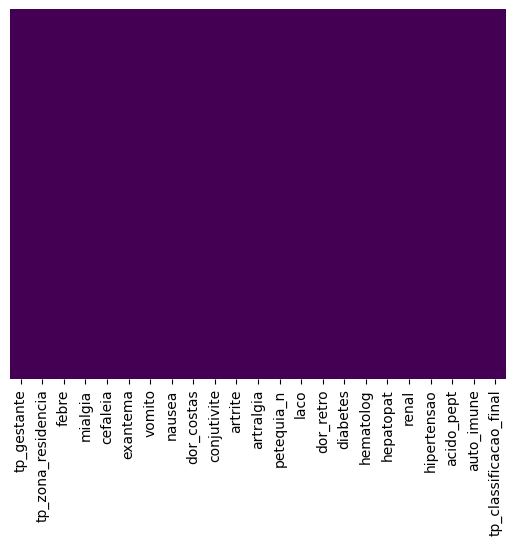

In [15]:
sns.heatmap(df3.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='tp_classificacao_final', ylabel='count'>

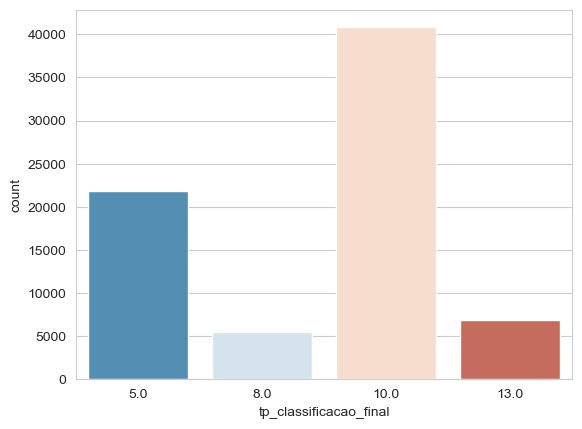

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='tp_classificacao_final',data=df3,palette='RdBu_r')

<Axes: xlabel='tp_classificacao_final', ylabel='count'>

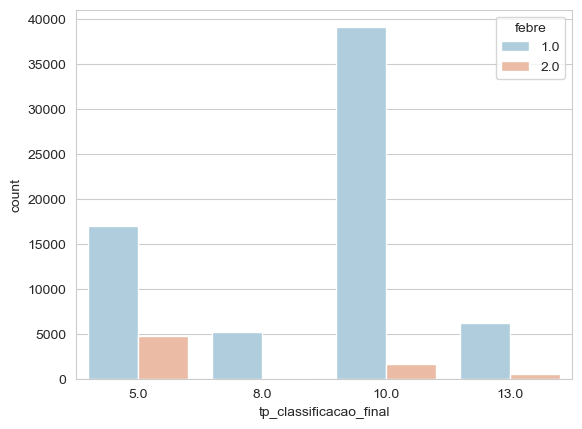

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='tp_classificacao_final',hue='febre',data=df3,palette='RdBu_r')

In [18]:
x=df3.iloc[:,:-1]
y=df.iloc[:,22]

In [19]:
x

,tp_gestante,tp_zona_residencia,febre,mialgia,cefaleia,exantema,vomito,nausea,dor_costas,conjutivite,...,petequia_n,laco,dor_retro,diabetes,hematolog,hepatopat,renal,hipertensao,acido_pept,auto_imune
0,6.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,6.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,6.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,6.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,5.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83023,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
83034,6.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
83039,5.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
83067,6.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0


In [20]:
classifier=tree.DecisionTreeClassifier()

In [21]:
classifier=classifier.fit(x,y)

In [22]:
prediction=classifier.predict([[6,1,2,1,2,2,1,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2]])

C:\Users\OBYDUL HAQUE EMON\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [23]:
prediction

array([5.])

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.20, random_state=1)

In [26]:
classifier_=tree.DecisionTreeClassifier()

In [27]:
classifier_=classifier_.fit(xtrain,ytrain)

In [28]:
prediction_=classifier.predict([[6,1,2,1,2,2,1,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2]])

C:\Users\OBYDUL HAQUE EMON\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [29]:
prediction_

array([5.])

In [30]:
classifier_.score(xtest,ytest)

0.6035771489588895

In [31]:
pred=classifier_.predict(xtest)

In [32]:
pred

array([10., 10., 13., ..., 10., 10., 10.])

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(ytest,pred)

0.6035771489588895

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(ytest,pred)

array([[1444,   24, 2674,  256],
       [  89,    3,  968,   27],
       [ 735,   11, 7091,  315],
       [ 231,    8,  602,  506]], dtype=int64)

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

         5.0       0.58      0.33      0.42      4398
         8.0       0.07      0.00      0.01      1087
        10.0       0.63      0.87      0.73      8152
        13.0       0.46      0.38      0.41      1347

    accuracy                           0.60     14984
   macro avg       0.43      0.39      0.39     14984
weighted avg       0.56      0.60      0.56     14984



In [39]:
classifier.score(x,y)

0.634747323740623

In [40]:
prd=classifier.predict(x)

In [41]:
accuracy_score(y,prd)

0.634747323740623

In [42]:
confusion_matrix(y,prd)

array([[ 8089,    10, 12781,   937],
       [  380,   144,  4827,    85],
       [ 3226,    28, 36248,  1315],
       [  973,    23,  2779,  3073]], dtype=int64)

In [43]:
print(classification_report(y,prd))

              precision    recall  f1-score   support

         5.0       0.64      0.37      0.47     21817
         8.0       0.70      0.03      0.05      5436
        10.0       0.64      0.89      0.74     40817
        13.0       0.57      0.45      0.50      6848

    accuracy                           0.63     74918
   macro avg       0.64      0.43      0.44     74918
weighted avg       0.64      0.63      0.59     74918



In [44]:
df4=df.fillna({'tp_gestante':df['tp_gestante'].median(),'tp_zona_residencia':df['tp_zona_residencia'].median(),
               'febre':df['febre'].median(),'mialgia':df['mialgia'].median(),
               'cefaleia':df['cefaleia'].median(),'exantema':df['exantema'].median(),'vomito':df['vomito'].median(),
               'nausea':df['nausea'].median(),'dor_costas':df['dor_costas'].median(),'conjutivite':df['conjutivite'].median(),
               'artrite':df['artrite'].median(),'artralgia':df['artralgia'].median(),'petequia_n':df['petequia_n'].median(),
               'laco':df['laco'].median(),'dor_retro':df['dor_retro'].median(),'diabetes':df['diabetes'].median(),
               'hematolog':df['hematolog'].median(),'hepatopat':df['hepatopat'].median(),'renal':df['renal'].median(),
               'hipertensao':df['hipertensao'].median(),'acido_pept':df['acido_pept'].median(),'auto_imune':df['auto_imune'].median()})

In [45]:
df4.isnull().sum()

tp_gestante               0
tp_zona_residencia        0
febre                     0
mialgia                   0
cefaleia                  0
exantema                  0
vomito                    0
nausea                    0
dor_costas                0
conjutivite               0
artrite                   0
artralgia                 0
petequia_n                0
laco                      0
dor_retro                 0
diabetes                  0
hematolog                 0
hepatopat                 0
renal                     0
hipertensao               0
acido_pept                0
auto_imune                0
tp_classificacao_final    0
dtype: int64

In [46]:
a=df4.iloc[:,:-1]
b=df4.iloc[:,22]

In [47]:
atrain, atest, btrain, btest = train_test_split(a,b,test_size=.20, random_state=1)

In [48]:
test4=tree.DecisionTreeClassifier()

In [49]:
test4=test4.fit(atrain,btrain)

In [50]:
p=test4.predict(atest)

In [51]:
p

array([10., 10., 13., ..., 10., 10., 10.])

In [52]:
test4.score(atest,btest)

0.6034436732514682

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
reg=LinearRegression()

In [55]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [56]:
df2=df
df2.shape

(74918, 23)

In [57]:
df2.dropna(subset=['tp_classificacao_final']).shape

(74918, 23)